## 💽 Google Drive Mount

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## ⬇️ Data Download

In [2]:
!unzip /content/drive/MyDrive/emirhan_human_dataset.zip

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: datasets/human_data/train_data/running/images_101.jpg  
  inflating: datasets/human_data/train_data/running/images_102 (2).jpg  
  inflating: datasets/human_data/train_data/running/images_102.jpg  
  inflating: datasets/human_data/train_data/running/images_103 (2).jpg  
  inflating: datasets/human_data/train_data/running/images_103.jpg  
  inflating: datasets/human_data/train_data/running/images_104 (2).jpg  
  inflating: datasets/human_data/train_data/running/images_104 (3).jpg  
  inflating: datasets/human_data/train_data/running/images_104.jpg  
  inflating: datasets/human_data/train_data/running/images_105 (2).jpg  
  inflating: datasets/human_data/train_data/running/images_105 (3).jpg  
  inflating: datasets/human_data/train_data/running/images_105 (4).jpg  
  inflating: datasets/human_data/train_data/running/images_105.jpg  
  inflating: datasets/human_data/train_data/running/images_106 (2).jpg  
  inflating: datasets/hu

## 📥 > 📙 Import to Libraries

In [3]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import Callback, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import *
from tensorflow import keras
from tensorflow.keras import Sequential
import tensorflow as tf

## 📋 Data Preparing

In [4]:
train_datagen = ImageDataGenerator(
    featurewise_center=True,
    samplewise_center=False,
    featurewise_std_normalization=True,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1.0/255.0,
    preprocessing_function=None,
    data_format=None,
    dtype=None)
test_datagen = ImageDataGenerator(
    featurewise_center=True,
    samplewise_center=False,
    featurewise_std_normalization=True,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1.0/255.0,
    preprocessing_function=None,
    data_format=None,
    dtype=None)
train_generator = train_datagen.flow_from_directory("/content/datasets/human_data/train_data",target_size=(128, 128),
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    interpolation="nearest")
test_generator = test_datagen.flow_from_directory("/content/datasets/human_data/test_data",target_size=(128, 128),
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    interpolation="nearest")

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


## 🧱 Models Structure and Code [Function]

In [ ]:
def func(pre,name_model):
    print('#####~Model => {} '.format(name_model))
    pre_model = name_model(input_shape=(128,128, 3),
                   include_top=False,
                   weights='imagenet',
                   pooling='avg')
    pre_model.trainable = False
    inputs = pre_model.input
    x = Dense(64, activation='relu')(pre_model.output)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(15, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss = 'categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
    my_callbacks  = [EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              mode='auto')]
    
    history = model.fit(train_generator,validation_data=test_generator,epochs=50,callbacks=my_callbacks,verbose=0)
    # Plotting Accuracy, val_accuracy, loss, val_loss
    fig, ax = plt.subplots(1, 2, figsize=(10, 3))
    ax = ax.ravel()

    for i, met in enumerate(['accuracy', 'loss']):
        ax[i].plot(history.history[met])
        ax[i].plot(history.history['val_' + met])
        ax[i].set_title('Model {}'.format(met))
        ax[i].set_xlabel('epochs')
        ax[i].set_ylabel(met)
        ax[i].legend(['Train', 'Validation'])
    plt.show()
    
    # Predict Data Test
    pred = model.predict(test_generator)
    pred = np.argmax(pred,axis=1)
    labels = (train_generator.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    pred = [labels[k] for k in pred]
    
    print('\033[01m              Classification_report \033[0m')
    
    print('\033[01m              Results \033[0m')
    # Results
    results = model.evaluate(test_generator, verbose=0)
    print("    Test Loss:\033[31m \033[01m {:.5f} \033[30m \033[0m".format(results[0]))
    print("Test Accuracy:\033[32m \033[01m {:.2f}% \033[30m \033[0m".format(results[1] * 100))
    
    return results

In [5]:
def emir_model():
  inp = Input(shape = (128,128,3))

  x = Conv2D(32, (3,3), strides=(1, 1), padding='same', activation='tanh', use_bias=True)(inp)
  x = BatchNormalization()(x)
  x = Conv2D(32, (3,3), strides=(1, 1), padding='same', activation='tanh', use_bias=True)(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=None)(x)
  x = Conv2D(64, (3,3), strides=(1, 1), padding='same', activation='tanh', use_bias=True)(x)
  x = BatchNormalization()(x)
  x = Conv2D(64, (3,3), strides=(1, 1), padding='same', activation='tanh', use_bias=True)(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=None)(x)
  x = Conv2D(128, (3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(x)
  x = BatchNormalization()(x)
  x = Conv2D(128, (3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=None)(x)
  x = Conv2D(256, (3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(x)
  x = BatchNormalization()(x)
  x = Conv2D(256, (3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=None)(x)
  x = Conv2D(512, (3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(x)
  x = BatchNormalization()(x)
  x = Conv2D(512, (3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=None)(x)
  x = Conv2D(1024, (3,3), strides=(2, 2), padding='same', activation='relu', use_bias=True)(x)
  x = BatchNormalization()(x)
  x = Conv2D(1024, (3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=None)(x)
  x = GlobalAveragePooling2D()(x)
  x = Dense(128, activation='relu')(x)
  x = Dense(64, activation='relu')(x)
  x = Dense(15, activation='softmax')(x)

  model = Model(inputs=inp, outputs= x)
  return model

In [6]:
def func(name_model):

    print('#####~Model => {} '.format(name_model))

    model = emir_model()
    model.summary()

    model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
    my_callbacks  = [EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              mode='auto')]
    
    history = model.fit(train_generator,
                        validation_data=test_generator,
                        epochs=64,
                        callbacks=my_callbacks,
                        verbose=0,
                        batch_size=128,)
    # Plotting Accuracy, val_accuracy, loss, val_loss
    fig, ax = plt.subplots(1, 2, figsize=(10, 3))
    ax = ax.ravel()

    for i, met in enumerate(['accuracy', 'loss']):
        ax[i].plot(history.history[met])
        ax[i].plot(history.history['val_' + met])
        ax[i].set_title('Model {}'.format(met))
        ax[i].set_xlabel('epochs')
        ax[i].set_ylabel(met)
        ax[i].legend(['Train', 'Validation'])
    plt.show()
    
    # Predict Data Test
    pred = model.predict(test_generator)
    pred = np.argmax(pred,axis=1)
    labels = (train_generator.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    pred = [labels[k] for k in pred]
    
    print('\033[01m              Classification_report \033[0m')
    
    print('\033[01m              Results \033[0m')
    # Results
    results = model.evaluate(test_generator, verbose=0)
    print("    Test Loss:\033[31m \033[01m {:.5f} \033[30m \033[0m".format(results[0]))
    print("Test Accuracy:\033[32m \033[01m {:.2f}% \033[30m \033[0m".format(results[1] * 100))
    
    return results

In [ ]:
def depth(x, strides):
    x = DepthwiseConv2D(3,strides=strides,padding='same',  use_bias=False)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x
def single_conv_block(x,filters):
    x = Conv2D(filters,1,use_bias=False)(x)
    x= BatchNormalization()(x)
    x = ReLU()(x)
    x = SpatialDropout2D(0.2)(x)
    return x
def hidden_layers(x,filters,strides):
    x = depth(x,strides)
    x = single_conv_block(x, filters)
    return x
def EmirhanModel(input_shape=(128,128,3),n_classes = 15):
    input = Input (input_shape)
    x = Conv2D(32,3,strides=(2,2),padding = 'same', use_bias=False) (input)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = ZeroPadding2D(padding=(2, 2))(x)
    x = hidden_layers(x,64, strides=(1,1))
    x = hidden_layers(x,128,strides=(2,2))
    x = hidden_layers(x,128,strides=(1,1))
    x = hidden_layers(x,256,strides=(2,2))
    x = hidden_layers(x,256,strides=(1,1))
    x = hidden_layers(x,512,strides=(2,2))
    for _ in range(5):
      x = hidden_layers(x,512,strides=(1,1))
      x = hidden_layers(x,1024,strides=(2,2))
      x = hidden_layers(x,1024,strides=(1,1))
      x = GlobalAveragePooling2D()(x)
      x = Dense(64, activation='relu')(x)
      x = Dense(64, activation='relu')(x)
      output = Dense(n_classes,activation='softmax')(x)
      model = Model(input, output)
      return model
number_of_classes = 15
input_shape = (128,128,3)

In [ ]:
def func(name_model):

    print('#####~Model => {} '.format(name_model))

    model = EmirhanModel(input_shape,number_of_classes)
    print(model.summary())
    model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
    my_callbacks  = [EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              mode='auto')]
    
    history = model.fit(train_generator,
                        validation_data=test_generator,
                        epochs=64,
                        callbacks=my_callbacks,
                        verbose=0,
                        batch_size=128,)
    # Plotting Accuracy, val_accuracy, loss, val_loss
    fig, ax = plt.subplots(1, 2, figsize=(10, 3))
    ax = ax.ravel()

    for i, met in enumerate(['accuracy', 'loss']):
        ax[i].plot(history.history[met])
        ax[i].plot(history.history['val_' + met])
        ax[i].set_title('Model {}'.format(met))
        ax[i].set_xlabel('epochs')
        ax[i].set_ylabel(met)
        ax[i].legend(['Train', 'Validation'])
    plt.show()
    
    # Predict Data Test
    pred = model.predict(test_generator)
    pred = np.argmax(pred,axis=1)
    labels = (train_generator.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    pred = [labels[k] for k in pred]
    
    print('\033[01m              Classification_report \033[0m')
    
    print('\033[01m              Results \033[0m')
    # Results
    results = model.evaluate(test_generator, verbose=0)
    print("    Test Loss:\033[31m \033[01m {:.5f} \033[30m \033[0m".format(results[0]))
    print("Test Accuracy:\033[32m \033[01m {:.2f}% \033[30m \033[0m".format(results[1] * 100))
    
    return results

## 🏃‍♂️ Prep Models and My Model Benchmark Scores

### VGG19

#####~Model => <function VGG19 at 0x7fcc9cb9f8c0> 
80150528/80134624 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


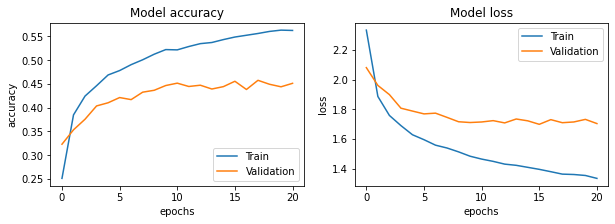

              Classification_report 
              Results 
    Test Loss:  1.70311  
Test Accuracy:  45.13%  


In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
result_VGG19 = func(preprocess_input,VGG19)

### VGG16

#####~Model => <function VGG16 at 0x7fcc9cb9f3b0> 
58900480/58889256 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


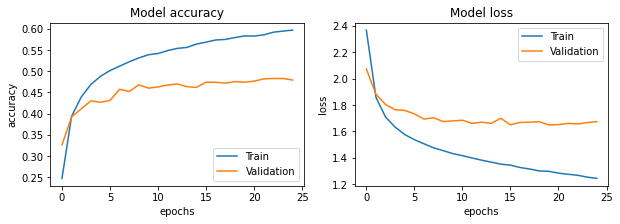

              Classification_report 
              Results 
    Test Loss:  1.67496  
Test Accuracy:  47.93%  


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
result_VGG16 = func(preprocess_input,VGG16)

### ResNet50

#####~Model => <function ResNet50 at 0x7fcc9cb98440> 
94781440/94765736 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


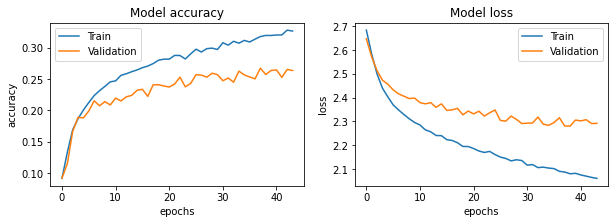

              Classification_report 
              Results 
    Test Loss:  2.29231  
Test Accuracy:  26.37%  


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
result_ResNet50 = func(preprocess_input,ResNet50)

### ResNet101

#####~Model => <function ResNet101 at 0x7fcc9cb984d0> 
171458560/171446536 [==============================] - 6s 0us/step


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


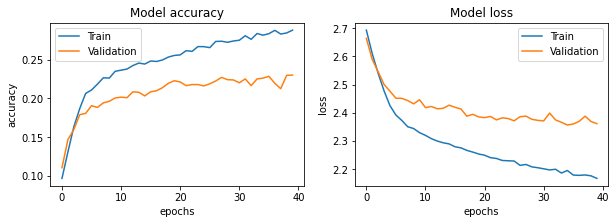

              Classification_report 
              Results 
    Test Loss:  2.36109  
Test Accuracy:  23.03%  


In [ ]:
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications.resnet import preprocess_input
result_ResNet101 = func(preprocess_input,ResNet101)

### MobileNet

#####~Model => <function MobileNet at 0x7fcc9cbfb290> 


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


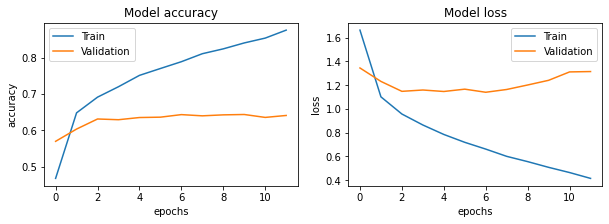

              Classification_report 
              Results 
    Test Loss:  1.31420  
Test Accuracy:  64.10%  


In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
result_MobileNet = func(preprocess_input,MobileNet)

### DenseNet201

#####~Model => <function DenseNet201 at 0x7fcc9cbd9200> 
74850304/74836368 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


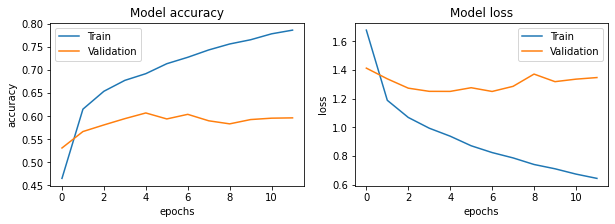

              Classification_report 
              Results 
    Test Loss:  1.34649  
Test Accuracy:  59.60%  


In [ ]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.applications.densenet import preprocess_input
result_DenseNet201 = func(preprocess_input,DenseNet201)

### EfficientNetB7

#####~Model => <function EfficientNetB7 at 0x7fcc9cbe63b0> 
258088960/258076736 [==============================] - 6s 0us/step


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


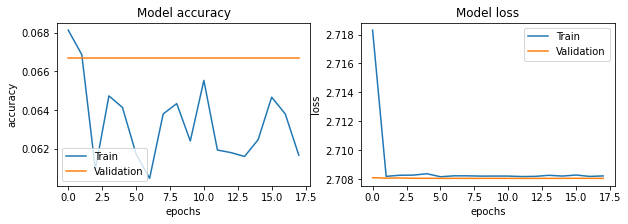

              Classification_report 
              Results 
    Test Loss:  2.70806  
Test Accuracy:  6.67%  


In [ ]:
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.applications.efficientnet import preprocess_input
result_Eff = func(preprocess_input,EfficientNetB7)

### Xception

#####~Model => <function Xception at 0x7fcc9cb9fdd0> 
83697664/83683744 [==============================] - 2s 0us/step


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


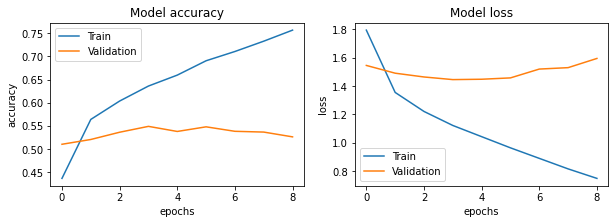

              Classification_report 
              Results 
    Test Loss:  1.59461  
Test Accuracy:  52.63%  


In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input
result_Xception = func(preprocess_input,Xception)

### InceptionResNetV2

#####~Model => <function InceptionResNetV2 at 0x7fcc9cbeaef0> 
219070464/219055592 [==============================] - 5s 0us/step


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


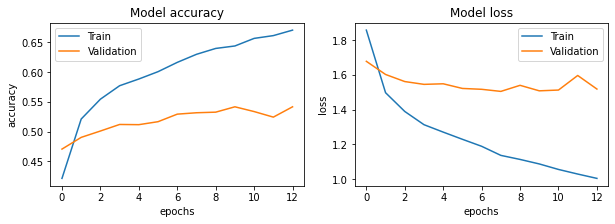

              Classification_report 
              Results 
    Test Loss:  1.51831  
Test Accuracy:  54.17%  


In [ ]:
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
result_InResNetV2 = func(preprocess_input,InceptionResNetV2)

### Model Emirhan

#####~Model => Emirhan_Human_Action_Detection_with_Artificial_Intelligence 
Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_38 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_497 (Conv2D)         (None, 128, 128, 32)      896       
                                                                 
 batch_normalization_607 (Ba  (None, 128, 128, 32)     128       
 tchNormalization)                                               
                                                                 
 conv2d_498 (Conv2D)         (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_608 (Ba  (None, 128, 128, 32)     128       
 tchNormalization)                                               
                                                

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


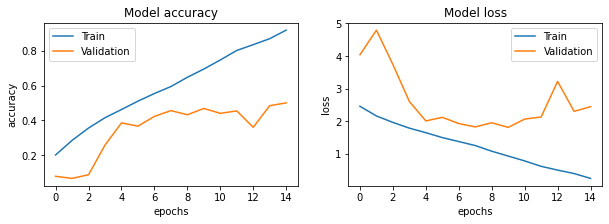

              Classification_report 
              Results 
    Test Loss:  2.44556  
Test Accuracy:  50.03%  


In [ ]:
model_name = "Emirhan_Human_Action_Detection_with_Artificial_Intelligence"
result_emirhan = func(model_name)

## 📊 Finally Result of Table (DataFrame - Pandas)

In [ ]:
accuracy_result_table = pd.DataFrame({'Model':['Emirhan_Model','VGG16','VGG19','ResNet50','ResNet101','MobileNet','InceptionResNetV2',
                               'DenseNet201','Xception','EfficientNetB7'],
                      'Accuracy':[result_emirhan[1],result_VGG16[1], result_VGG19[1], result_ResNet50[1], result_ResNet101[1],
                                  result_MobileNet[1],result_InResNetV2[1],result_DenseNet201[1],result_Xception[1],
                                 result_Eff[1]]})

In [ ]:
accuracy_result_table

,Model,Accuracy
0,Emirhan_Model,0.500333
1,VGG16,0.479333
2,VGG19,0.451333
3,ResNet50,0.263667
4,ResNet101,0.230333
5,MobileNet,0.641000
6,InceptionResNetV2,0.541667
7,DenseNet201,0.596000
8,Xception,0.526333
9,EfficientNetB7,0.066667


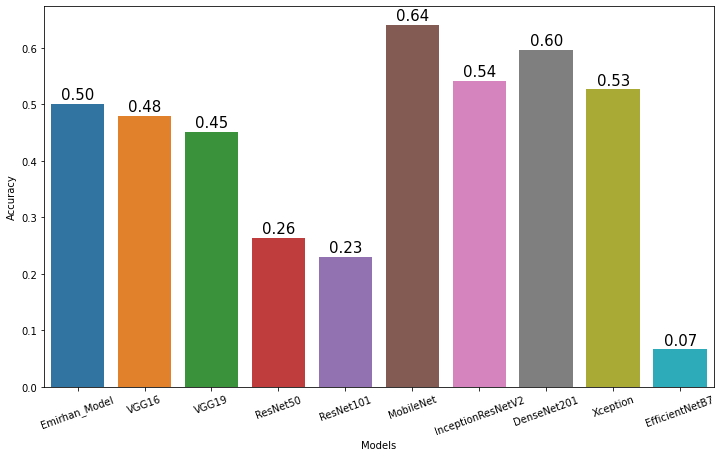

In [ ]:
plt.figure(figsize=(12, 7))
plots = sns.barplot(x='Model', y='Accuracy', data=accuracy_result_table)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 9),
                   textcoords='offset points')

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=20);

In [ ]:
loss_result_table = pd.DataFrame({'Model':['Emirhan_Model','VGG16','VGG19','ResNet50','ResNet101','MobileNet','InceptionResNetV2',
                               'DenseNet201','Xception','EfficientNetB7'],
                      'Loss':[result_emirhan[0],result_VGG16[0], result_VGG19[0], result_ResNet50[0], result_ResNet101[0],
                                  result_MobileNet[0],result_InResNetV2[0],result_DenseNet201[0],result_Xception[0],
                                 result_Eff[0]]})

In [ ]:
loss_result_table

,Model,Loss
0,Emirhan_Model,2.445559
1,VGG16,1.674958
2,VGG19,1.703110
3,ResNet50,2.292310
4,ResNet101,2.361086
5,MobileNet,1.314200
6,InceptionResNetV2,1.518312
7,DenseNet201,1.346494
8,Xception,1.594606
9,EfficientNetB7,2.708055


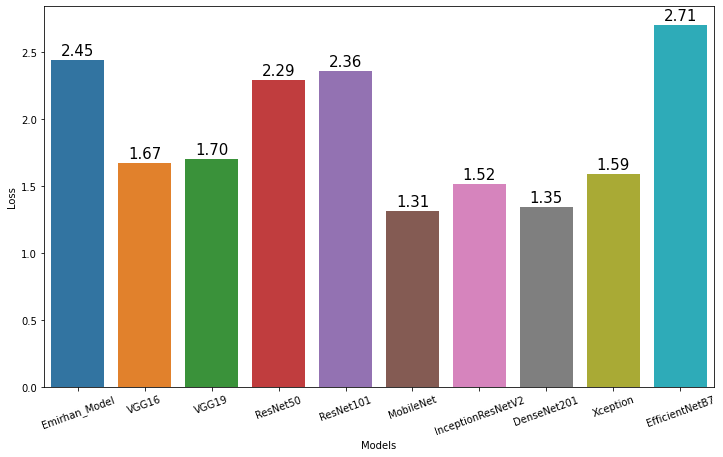

In [ ]:
plt.figure(figsize=(12, 7))
plots = sns.barplot(x='Model', y='Loss', data=loss_result_table)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 9),
                   textcoords='offset points')

plt.xlabel("Models")
plt.ylabel("Loss")
plt.xticks(rotation=20);